### TensorFlow 2.0 선택
[런타임] -> [런타임 유형변경]에서 하드웨어 가속기를 꼭 GPU로 설정!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [3]:
## Importing Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


# Simple CNN for Cifar10 Dataset

In [0]:
## Hyper Parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 100
n_class = 10

In [0]:
## Data 준비

## MNIST Dataset #########################################################
#mnist = keras.datasets.mnist
#class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

## Cifar10 Dataset #########################################################
cifar = keras.datasets.cifar10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
############################################################################

In [6]:
## Dataset 만들기
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()    
    
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
#train_images = np.expand_dims(train_images, axis=-1)
#test_images = np.expand_dims(test_images, axis=-1)
print(train_images.shape)
print(test_images.shape)
n_train = train_images.shape[0]
n_test = test_images.shape[0]
    
train_labels = to_categorical(train_labels, n_class)
test_labels = to_categorical(test_labels, n_class)    

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size).repeat()

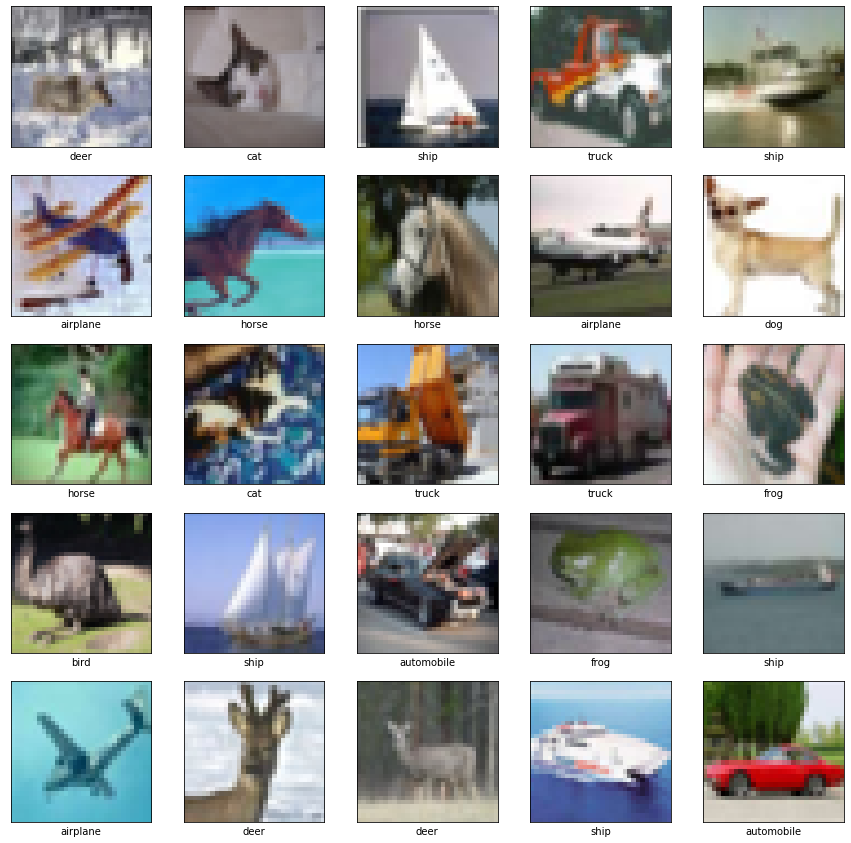

In [8]:
## Data 확인
plt.figure(figsize=(15,15))
for i in range(25):
    img_idx = np.random.randint(0, 49999)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[img_idx])
    plt.xlabel(class_names[np.argmax(train_labels[img_idx])])

In [9]:
## Model 만들기
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D, Dense, Concatenate

def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='SAME', 
                                  input_shape=(32, 32, 3)))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [0]:
## model compile
model.compile(optimizers=keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
## Training
steps_per_epoch = n_train/batch_size
validation_steps = n_test/batch_size

In [12]:
history = model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Train for 500.0 steps, validate for 100.0 steps
Epoch 1/20
500/500 [==============================] - 10s 19ms/step - loss: 1.6630 - accuracy: 0.4018 - val_loss: 1.2655 - val_accuracy: 0.5582
Epoch 2/20
500/500 [==============================] - 4s 8ms/step - loss: 1.1939 - accuracy: 0.5778 - val_loss: 1.0616 - val_accuracy: 0.6243
Epoch 3/20
500/500 [==============================] - 4s 8ms/step - loss: 0.9963 - accuracy: 0.6519 - val_loss: 0.9427 - val_accuracy: 0.6700
Epoch 4/20
500/500 [==============================] - 4s 9ms/step - loss: 0.8717 - accuracy: 0.6943 - val_loss: 0.8414 - val_accuracy: 0.7059
Epoch 5/20
500/500 [==============================] - 4s 8ms/step - loss: 0.7750 - accuracy: 0.7312 - val_loss: 0.9133 - val_accuracy: 0.6854
Epoch 6/20
500/500 [==============================] - 4s 8ms/step - loss: 0.7019 - accuracy: 0.7570 - val_loss: 0.7961 - val_accuracy: 0.7323
Epoch 7/20
500/500 [==============================] - 4s 8ms/step - loss: 0.6410 - accuracy: 0.777

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

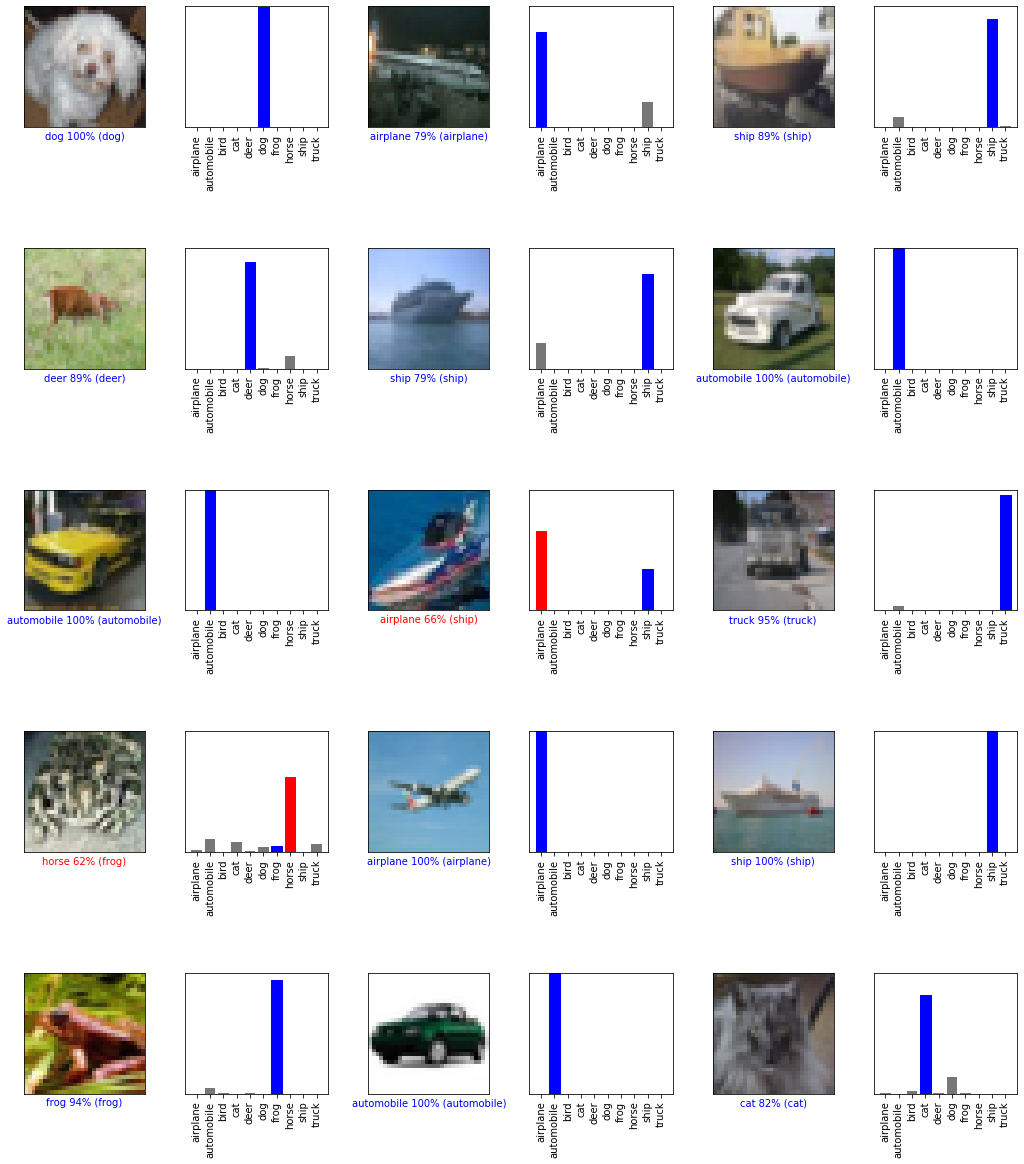

In [14]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# GoogLeNet for Cifar10 Dataset

In [0]:
## Hyperparameters
learning_rate = 0.0005
training_epochs = 20
batch_size = 100
img_size = 224
n_class = 10

In [0]:
## data preprocessing - resize image
def img_resize(images, labels):
  return tf.image.resize(images, (img_size, img_size)), labels

In [17]:
## Dataset 만들기
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()    
    
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
#train_images = np.expand_dims(train_images, axis=-1)
#test_images = np.expand_dims(test_images, axis=-1)
print(train_images.shape)
print(test_images.shape)
n_train = train_images.shape[0]
n_test = test_images.shape[0]
    
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10) 

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=50000).batch(batch_size).map(img_resize).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(
                batch_size).map(img_resize).repeat()

In [0]:
## GoogLeNet
from tensorflow.keras.layers import Input, Conv2D, Dense, MaxPool2D, GlobalAveragePooling2D, Concatenate, Dropout

def create_model():
    ## Stem
    inputs = Input(shape=(img_size, img_size, 3))
    net = Conv2D(64, 7, 2, 'SAME', activation='relu')(inputs)
    net = MaxPool2D(3, 2, 'SAME')(net)
    net = Conv2D(64, 1, 1, 'SAME', activation='relu')(net)
    net = Conv2D(192, 3, 1, 'SAME', activation='relu')(net)
    net = MaxPool2D(3, 2, 'SAME')(net)
    ## inception 3a
    b1 = Conv2D(64, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(96, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(128, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(16, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(32, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(32, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## inception 3b
    b1 = Conv2D(128, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(128, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(192, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(32, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(96, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(64, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## 
    net = MaxPool2D(3, 2, 'SAME')(net)
    ## inception 4a
    b1 = Conv2D(192, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(96, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(208, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(16, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(48, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(64, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## inception 4b
    b1 = Conv2D(160, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(112, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(224, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(24, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(64, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(64, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## inception 4c
    b1 = Conv2D(128, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(128, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(256, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(24, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(64, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(64, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## inception 4d
    b1 = Conv2D(112, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(144, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(288, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(32, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(64, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(64, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## inception 4e
    b1 = Conv2D(256, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(160, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(320, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(32, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(128, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(128, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ##
    net = MaxPool2D(3, 2, 'SAME')(net)
    ## inception 5a
    b1 = Conv2D(256, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(160, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(320, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(32, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(128, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(128, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## inception 5b
    b1 = Conv2D(384, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(192, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(384, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(48, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(128, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(128, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## global average pooling
    net = GlobalAveragePooling2D()(net)
    net = Dropout(0.4)(net)
    net = Dense(10, activation='softmax')(net)
    
    return keras.Model(inputs=inputs, outputs=net)

In [20]:
model = create_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 56, 56, 64)   0           conv2d_3[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 56, 56, 64)   4160        max_pooling2d_3[0][0]            
______________________________________________________________________________________________

In [0]:
## Model Compile
model.compile(optimizers=keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
steps_per_epoch = n_train/batch_size
validation_steps = n_test/batch_size

model.evaluate(test_dataset, steps=validation_steps)

100/100 [==============================] - 11s 110ms/step - loss: 2.3026 - accuracy: 0.1000


[2.302600085735321, 0.1]

In [23]:
## Training
history = model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Train for 500.0 steps, validate for 100.0 steps
Epoch 1/20
500/500 [==============================] - 128s 256ms/step - loss: 2.4633 - accuracy: 0.1047 - val_loss: 2.3014 - val_accuracy: 0.1127
Epoch 2/20
500/500 [==============================] - 120s 240ms/step - loss: 2.2458 - accuracy: 0.1566 - val_loss: 1.9607 - val_accuracy: 0.2541
Epoch 3/20
500/500 [==============================] - 120s 241ms/step - loss: 1.8975 - accuracy: 0.2791 - val_loss: 1.7002 - val_accuracy: 0.3624
Epoch 4/20
500/500 [==============================] - 120s 240ms/step - loss: 1.6222 - accuracy: 0.4020 - val_loss: 1.4361 - val_accuracy: 0.4701
Epoch 5/20
500/500 [==============================] - 120s 240ms/step - loss: 1.4132 - accuracy: 0.4895 - val_loss: 1.3565 - val_accuracy: 0.5220
Epoch 6/20
500/500 [==============================] - 120s 241ms/step - loss: 1.2584 - accuracy: 0.5512 - val_loss: 1.2023 - val_accuracy: 0.5717
Epoch 7/20
500/500 [==============================] - 120s 240ms/step - loss

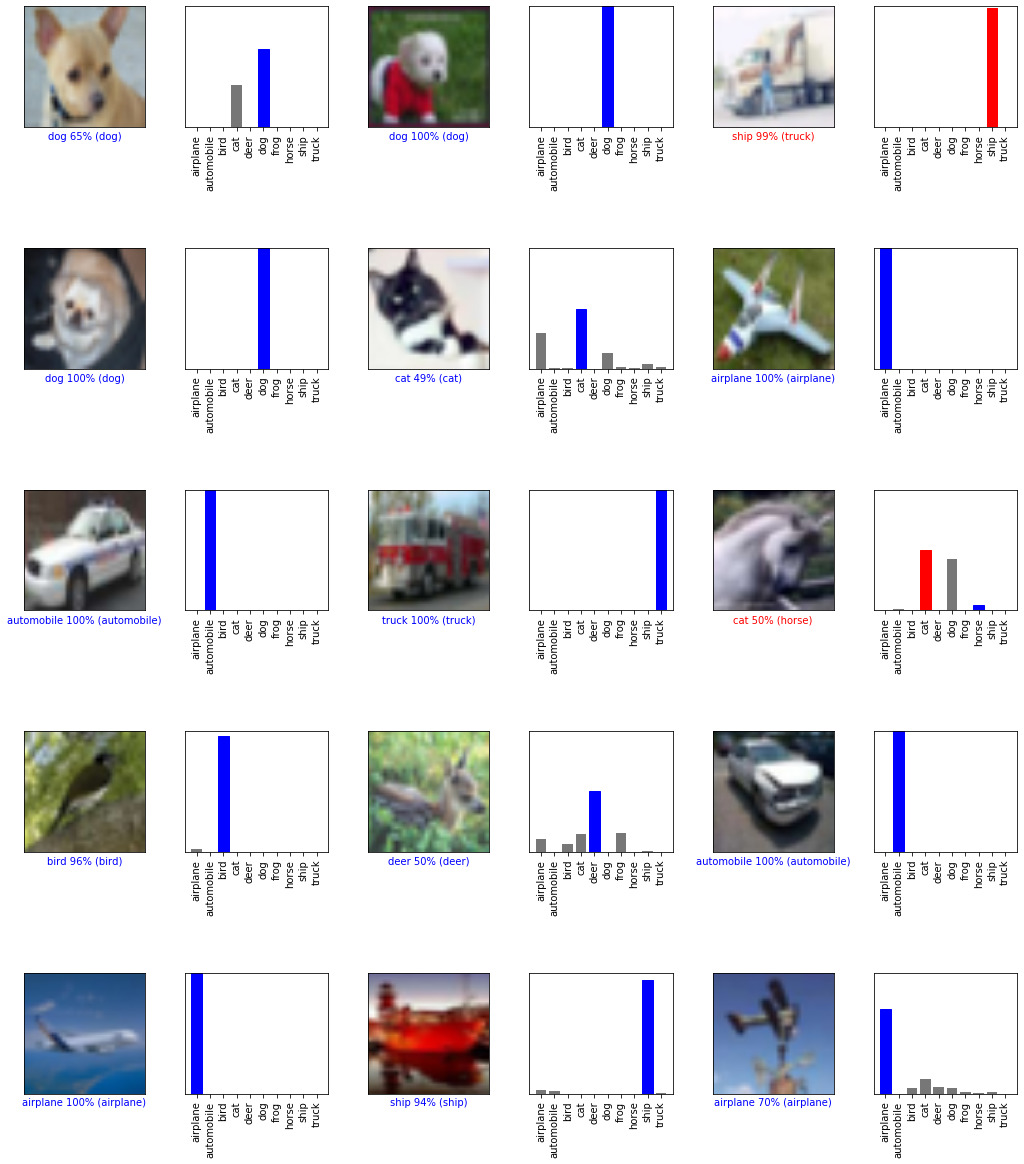

In [24]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# MobileNet for Cifar10 Dataset

In [0]:
## HyperParameters
learning_rate = 0.001
training_epochs = 20
batch_size = 100
img_size = 224
n_class = 10

In [0]:
## Data 준비

## MNIST Dataset #########################################################
#mnist = keras.datasets.mnist
#class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

## Cifar10 Dataset #########################################################
cifar = keras.datasets.cifar10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
############################################################################

In [0]:
## data preprocessing - resize image
def img_resize(images, labels):
  return tf.image.resize(images, (img_size, img_size)), labels

In [28]:
## Dataset 만들기
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()    
    
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
#train_images = np.expand_dims(train_images, axis=-1)
#test_images = np.expand_dims(test_images, axis=-1)
print(train_images.shape)
print(test_images.shape)
n_train = train_images.shape[0]
n_test = test_images.shape[0]
    
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10) 

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=50000).batch(batch_size).map(img_resize).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(
                batch_size).map(img_resize).repeat()

In [0]:
## MobileNet
from tensorflow.keras.layers import Conv2D, Dense, ReLU, Softmax, BatchNormalization, DepthwiseConv2D, GlobalAveragePooling2D

def create_model():
    model = keras.Sequential()
    model.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='SAME', 
                     use_bias=False, input_shape=(img_size, img_size, 3)))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=1, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=64, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=2, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=128, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=1, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=128, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=2, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=256, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=1, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=256, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=2, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=512, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=1, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=512, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=1, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=512, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=1, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=512, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=1, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=512, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=1, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=512, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=2, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=1024, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(DepthwiseConv2D(kernel_size=3, strides=1, padding='SAME', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(filters=1024, kernel_size=1, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(GlobalAveragePooling2D())
    model.add(Dense(units=128))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dense(units=10))
    model.add(BatchNormalization())
    model.add(Softmax())
    return model

In [31]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 112, 112, 32)      864       
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 32)      128       
_________________________________________________________________
re_lu (ReLU)                 (None, 112, 112, 32)      0         
_________________________________________________________________
depthwise_conv2d (DepthwiseC (None, 112, 112, 32)      288       
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 112, 112, 64)     

In [0]:
## Model Compile
model.compile(optimizers=keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
steps_per_epoch = n_train/batch_size
validation_steps = n_test/batch_size

model.evaluate(test_dataset, steps=validation_steps)

100/100 [==============================] - 9s 86ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3025851249694824, 0.1]

In [34]:
## Training
history = model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Train for 500.0 steps, validate for 100.0 steps
Epoch 1/20
500/500 [==============================] - 232s 463ms/step - loss: 1.4099 - accuracy: 0.5091 - val_loss: 2.8850 - val_accuracy: 0.1000
Epoch 2/20
500/500 [==============================] - 225s 451ms/step - loss: 0.8824 - accuracy: 0.7120 - val_loss: 1.3371 - val_accuracy: 0.5657
Epoch 3/20
500/500 [==============================] - 226s 451ms/step - loss: 0.6574 - accuracy: 0.7892 - val_loss: 0.9908 - val_accuracy: 0.6823
Epoch 4/20
500/500 [==============================] - 226s 451ms/step - loss: 0.5166 - accuracy: 0.8341 - val_loss: 1.2170 - val_accuracy: 0.6077
Epoch 5/20
500/500 [==============================] - 225s 451ms/step - loss: 0.4169 - accuracy: 0.8651 - val_loss: 0.8072 - val_accuracy: 0.7372
Epoch 6/20
500/500 [==============================] - 225s 449ms/step - loss: 0.3362 - accuracy: 0.8921 - val_loss: 1.0545 - val_accuracy: 0.6866
Epoch 7/20
500/500 [==============================] - 224s 448ms/step - loss

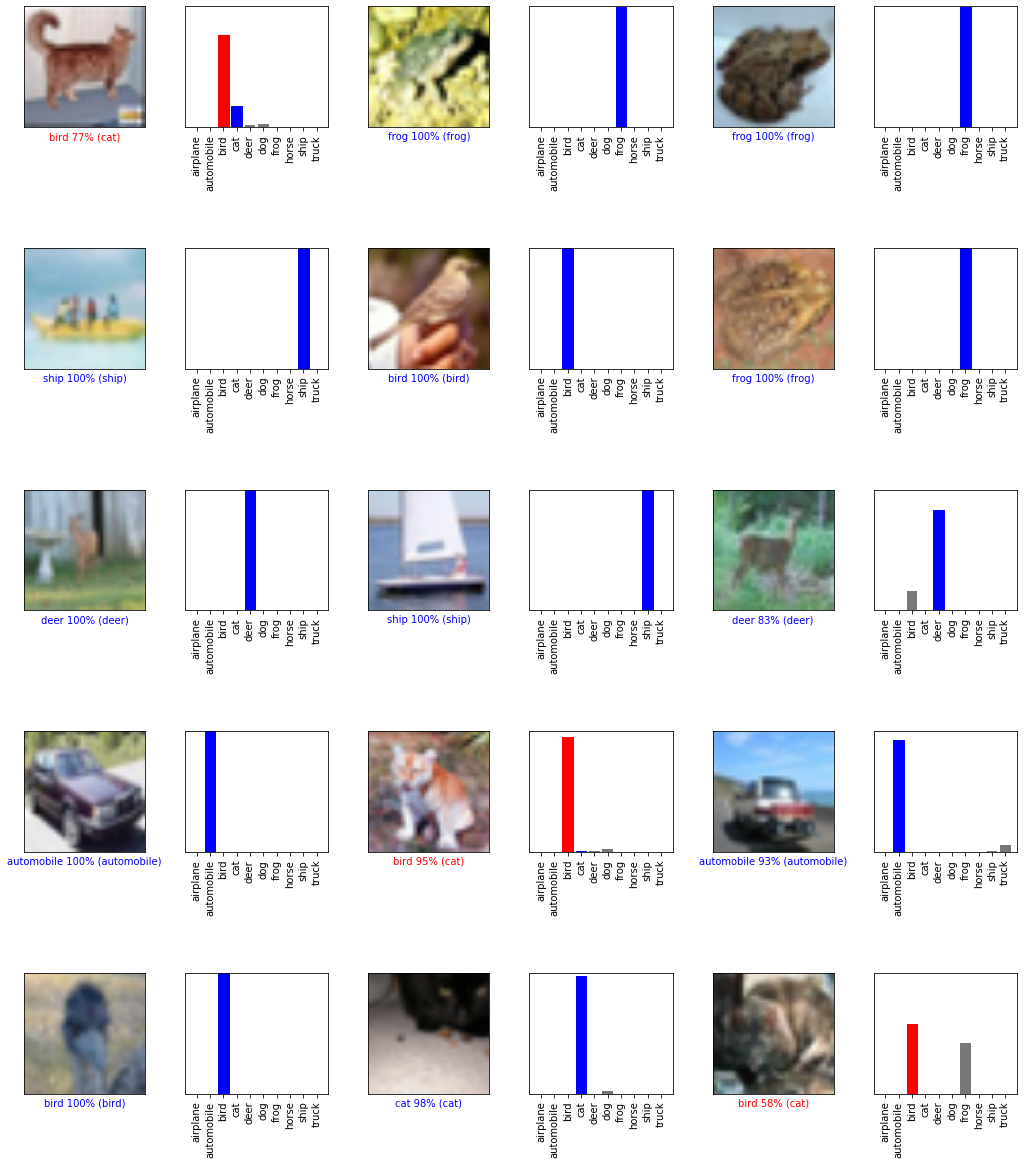

In [35]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# Inference Only by Pretrained MobileNet

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions

In [0]:
img_size = 224

In [38]:
## Pretrained MobileNet 가져오기
conv_base = MobileNet(weights='imagenet', include_top=True, input_shape=(img_size, img_size, 3))

17227776/17225924 [==============================] - 1s 0us/step


In [39]:
conv_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [40]:
## Google Drive로 이동
cd '/content/drive/My Drive/TensorFlow_Training_14th'

/content/drive/My Drive/TensorFlow_Training_14th


In [41]:
## Test image 열기
from PIL import Image
test_img = Image.open('data/guitar.jpg')
test_img = test_img.resize((img_size, img_size))
test_img = np.asarray(test_img)
test_img = np.reshape(test_img, (-1, img_size, img_size, 3))
test_img.shape

(1, 224, 224, 3)

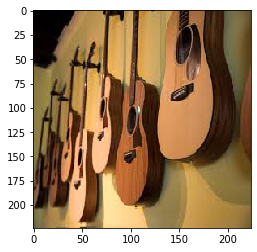

In [42]:
plt.imshow(test_img[0])
plt.show()

In [43]:
## MobileNet으로 inference하기
prediction = conv_base.predict(preprocess_input(test_img))
print(test_img.shape)
print(preprocess_input(test_img).shape)

(1, 224, 224, 3)
(1, 224, 224, 3)


In [44]:
## 예측결과확인
np.argmax(prediction)

402

In [45]:
decode_predictions(prediction, top=5)

40960/35363 [==================================] - 0s 0us/step


[[('n02676566', 'acoustic_guitar', 0.5215823),
  ('n02992211', 'cello', 0.27240372),
  ('n03272010', 'electric_guitar', 0.10318701),
  ('n04208210', 'shovel', 0.046063133),
  ('n04536866', 'violin', 0.017287519)]]

# Fine-tuning Pretrained MobileNet

In [0]:
from tensorflow.keras.layers import ReLU,Dense, BatchNormalization, Softmax, GlobalAveragePooling2D

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions

In [0]:
## HyperParameters
learning_rate = 0.0001
training_epochs = 10
batch_size = 100
img_size = 224
n_class = 10

In [0]:
## Data 준비

## MNIST Dataset #########################################################
#mnist = keras.datasets.mnist
#class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

## Cifar10 Dataset #########################################################
cifar = keras.datasets.cifar10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
############################################################################

In [0]:
## data preprocessing - resize image
def img_resize(images, labels):
  return tf.image.resize(images, (img_size, img_size)), labels

In [51]:
## Dataset 만들기
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()    
    
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
#train_images = np.expand_dims(train_images, axis=-1)
#test_images = np.expand_dims(test_images, axis=-1)
print(train_images.shape)
print(test_images.shape)
n_train = train_images.shape[0]
n_test = test_images.shape[0]
    
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10) 

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=50000).batch(batch_size).map(img_resize).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(
                batch_size).map(img_resize).repeat()

In [53]:
## Load Pretrained Model
conv_base = MobileNet(weights='imagenet', include_top=False,
                     input_shape=(img_size, img_size, 3))
conv_base.summary()
#conv_base.trainable = False
#conv_base.summary()

17227776/17225924 [==============================] - 1s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________

In [0]:
## Model 만들기
def create_model():
    model = keras.Sequential()
    model.add(conv_base)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Softmax())
    return model

In [55]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               131200    
_________________________________________________________________
batch_normalization_29 (Batc (None, 128)               512       
_________________________________________________________________
re_lu_28 (ReLU)              (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
_________________________________________________________________
batch_normalization_30 (Batc (None, 10)               

In [0]:
## Model Compile
model.compile(optimizers=keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
steps_per_epoch = n_train/batch_size
validation_steps = n_test/batch_size

model.evaluate(test_dataset, steps=validation_steps)

100/100 [==============================] - 10s 97ms/step - loss: 3.1987 - accuracy: 0.1183


[3.1987000417709353, 0.1183]

In [58]:
## Training
history = model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Train for 500.0 steps, validate for 100.0 steps
Epoch 1/10
500/500 [==============================] - 237s 474ms/step - loss: 0.5574 - accuracy: 0.8625 - val_loss: 0.7059 - val_accuracy: 0.8390
Epoch 2/10
500/500 [==============================] - 231s 462ms/step - loss: 0.2978 - accuracy: 0.9224 - val_loss: 0.5404 - val_accuracy: 0.8364
Epoch 3/10
500/500 [==============================] - 231s 462ms/step - loss: 0.2007 - accuracy: 0.9454 - val_loss: 0.4775 - val_accuracy: 0.8463
Epoch 4/10
500/500 [==============================] - 231s 463ms/step - loss: 0.1435 - accuracy: 0.9584 - val_loss: 0.4875 - val_accuracy: 0.8468
Epoch 5/10
500/500 [==============================] - 230s 461ms/step - loss: 0.1113 - accuracy: 0.9682 - val_loss: 0.3585 - val_accuracy: 0.8890
Epoch 6/10
500/500 [==============================] - 231s 461ms/step - loss: 0.0889 - accuracy: 0.9737 - val_loss: 0.3711 - val_accuracy: 0.8874
Epoch 7/10
500/500 [==============================] - 231s 462ms/step - loss

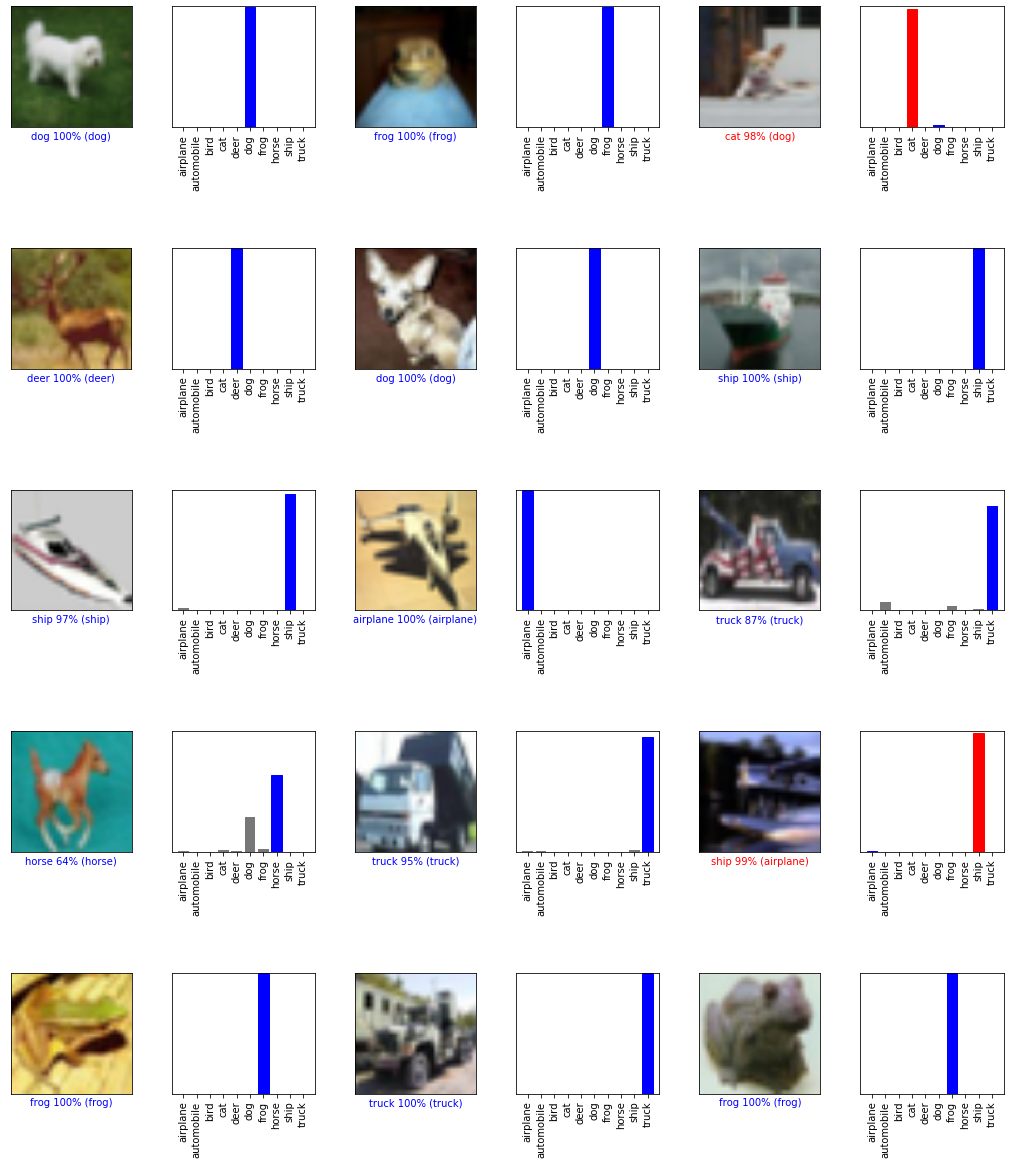

In [59]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break